In [1]:
%load_ext pycodestyle_magic

In [2]:
%flake8_on

# Wiskunde II: Portfolio <a name = 'begin'></a>

## Inhoud

1. [Deel A](#deela)
    1. [Analyse van 5 kolommen](#analys)
        1. [Geslacht](#geslacht)
        2. [Hoogste opleiding](#hopl)
        3. [Leeftijd](#age)
        4. [BMI](#bmi)
        5. [Werkeloos](#werkeloos)
    2. [Tabel van kengetallen en grafieken](#tabel)
    3. [Analyse van een binaire kolom](#rokers)
    4. [Discrete en continue verdelingen](#cholesterol)
    5. [Correlaties tussen kolommen](#corr_1)
2. [Deel B](#deelb)
    1. [Basiswaarden samengestelde variabele](#bas)
    2. [Het maken van Mental_Health](#mental)
    3. [](#)
3. [Deel C](#deelc)
    1. [Het lineaire verband](#lineair)
    2. [](#)
    3. [](#)

## Importeren van de dataset en modules

Eerst worden de benodigde modules geïmporteerd en de dataset wordt ingeladen.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('wisk2SPSSdatafile_def.csv')
display(df)

,Geslacht,Leeftijd,Hoogste_opleiding,Roker,Sigaretten_per_dag,Bloeddrukmedicatie,Hersenbloeding,Hoge_bloeddruk,Suikerziekte,Cholesterolwaarde,...,Fysieke_gezondheid,Mentale_gezondheid,Kinderen,Autobezit,Sociaal_functioneren,Empatisch_reageren,Positieve_levenshouding,Mentale_vaardigheden,Leven_in_balans,Persoonlijke_grenzen
0,1,39,4,0,0,0,0,0,0,195,...,5,4,1,0,4,3,3,2,1,1
1,0,46,2,0,0,0,0,0,0,250,...,3,6,0,0,5,4,3,2,5,5
2,1,48,1,1,20,0,0,0,0,245,...,5,4,1,0,4,3,4,4,5,5
3,0,61,3,1,30,0,0,1,0,225,...,2,3,0,0,5,5,3,2,4,3
4,0,46,3,1,23,0,0,0,0,285,...,2,5,0,0,4,3,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,65,2,0,0,#NULL!,0,1,0,270,...,4,5,1,0,1,4,4,4,5,5
396,1,39,3,0,0,0,0,0,0,202,...,3,6,0,0,2,1,4,4,3,2
397,0,47,2,1,3,0,0,0,0,155,...,2,6,0,1,3,2,2,1,4,3
398,1,59,1,1,43,0,0,0,0,207,...,3,6,0,0,1,1,5,4,5,4


In [5]:
display(df.describe(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Geslacht                       400 non-null    int64  
 1   Leeftijd                       400 non-null    int64  
 2   Hoogste_opleiding              400 non-null    int64  
 3   Roker                          400 non-null    int64  
 4   Sigaretten_per_dag             400 non-null    int64  
 5   Bloeddrukmedicatie             400 non-null    object 
 6   Hersenbloeding                 400 non-null    int64  
 7   Hoge_bloeddruk                 400 non-null    int64  
 8   Suikerziekte                   400 non-null    int64  
 9   Cholesterolwaarde              400 non-null    int64  
 10  Bloeddruk_systolisch           400 non-null    float64
 11  Bloeddruk_diastolisch          400 non-null    float64
 12  BMI_waarde                     400 non-null    flo

,Geslacht,Leeftijd,Hoogste_opleiding,Roker,Sigaretten_per_dag,Hersenbloeding,Hoge_bloeddruk,Suikerziekte,Cholesterolwaarde,Bloeddruk_systolisch,...,Fysieke_gezondheid,Mentale_gezondheid,Kinderen,Autobezit,Sociaal_functioneren,Empatisch_reageren,Positieve_levenshouding,Mentale_vaardigheden,Leven_in_balans,Persoonlijke_grenzen
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.0000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.405000,49.600000,1.975000,0.477500,9.490000,0.0025,0.300000,0.030000,237.482500,132.225000,...,2.877500,4.797500,0.29250,0.38750,2.892500,2.597500,3.065000,2.732500,3.092500,2.770000
std,0.491507,8.881001,1.032978,0.500119,12.724964,0.0500,0.458831,0.170801,43.296665,22.392363,...,1.109311,1.029146,0.45548,0.48779,1.210209,1.154915,1.272723,1.244917,1.306987,1.255404
min,0.000000,34.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,129.000000,94.000000,...,1.000000,2.000000,0.00000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,207.000000,116.000000,...,2.000000,4.000000,0.00000,0.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.0000,0.000000,0.000000,238.000000,128.000000,...,3.000000,5.000000,0.00000,0.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.0000,1.000000,0.000000,265.000000,144.000000,...,4.000000,6.000000,1.00000,1.00000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,1.000000,68.000000,4.000000,1.000000,60.000000,1.0000,1.000000,1.000000,464.000000,215.000000,...,5.000000,6.000000,1.00000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


None

[Terug naar het begin](#begin)

# Deel A: <a name = 'deela'></a>

Om te beginnen moeten er 5 kolommen worden gekozen, deze kolommen moeten alle verschillende meetniveau's bevatten. Er is gekozen voor de volgende 5 kolommen: Geslacht, Leeftijd, Hoogste_opleiding, BMI_waarde en Werkeloos.

In [29]:
# Tonen van de eerste 5 rijen van de 5 gekozen kolommen
display(df[['Geslacht', 'Leeftijd', 'Hoogste_opleiding',
            'BMI_waarde', 'Werkeloos']].head())

,Geslacht,Leeftijd,Hoogste_opleiding,BMI_waarde,Werkeloos
0,1,39,4,26.97,0
1,0,46,2,28.73,0
2,1,48,1,25.34,0
3,0,61,3,28.58,0
4,0,46,3,23.10,0


[Terug naar het begin](#begin)

## Analyse van 5 kolommen <a name='analys'></a>

Om te kijken waarmee er gewerkt gaat worden, zal er eerst gekeken worden naar de eerste 5 regels van de dataset. Op basis daarvan worden de eerste keuzes voor de kengetallen en meetniveau's gemaakt.

### Geslacht <a name='geslacht'></a>
Het geslacht bevindt zich op het nominale meetniveau, voor deze reden zal de modus gebruikt worden als kengetal. Om op een duidelijke manier met deze waarde om te kunnen gaan in python, zijn de waardes omgezet naar het volgende: {0 : man, 1 : vrouw}.

De modus van de eerste 5 regels is 0, er zijn namelijk 3 nullen en 2 énen. Dit geeft aan, op basis van de eerste 5 regels, dat de meest voorkomende geslacht man is.

Omdat bij de kolom 'Geslacht' sprake is van een nominale waarde met 2 mogelijke opties, is er gekozen voor een staafdiagram. Op deze manier is het makkelijk te zien hoe de verdeling in elkaar zit. Ook is het verschil tussen de waarde 'man' en 'vrouw' op deze manier het makkelijkst te tonen. Deze grafiek kan worden opgesteld worden door de seaborn functie sns.countplot te gebruiken, zoals te zien in het voorbeeld hieronder.

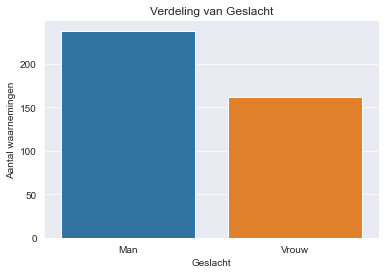

In [30]:
# Het plotten van de grafiek
sns.countplot(data=df, x='Geslacht')

# Aanpassen van de labels en titels
plt.xlabel('Geslacht')
plt.ylabel('Aantal waarnemingen')
plt.xticks([0, 1], ['Man', 'Vrouw'])
plt.title('Verdeling van Geslacht')
plt.show()

Het geslacht heeft in deze dataset 2 verschillende waardes, mannelijk en vrouwelijk. Deze waarde kennen geen numerieke schaal of volgorde. Het ene geslacht is namelijk niet beter dan het andere.

Het kengetal dat het beste past bij elke nominale waarde is de modus, dit is omdat er voor de andere kengetallen gebruik gemaakt moet worden van volgorde of duidelijke numerieke waarden. Voor nominale waarden is het daarom dus makkelijker om te kijken naar de frequentie en de modus.

In [31]:
# Tonen van de frequentie
print(df['Geslacht'].value_counts())

0    238
1    162
Name: Geslacht, dtype: int64


Bij het bekijken van de frequentie is er te zien dat de waarde 0 (= man) vaker gezien is dan de waarde 1 (= vrouw). Aangezien het totaal aantal rijen van deze dataset 400 is, geeft de frequentie weer dat ongeveer 60% van de mensen een man is. Dit geeft ook meteen het meest voorkomende geslacht in de dataset aan.

[Terug naar het begin](#begin)

--------------------

### Hoogste opleiding <a name='hopl'></a>
De hoogst behaalde opleiding bevindt zich op het ordinale meetniveau, daarom zal de mediaan gebruikt worden. Het verschil tussen een variabel als geslacht en deze is dat de hoogste opleiding wel een volgorde kent. Door deze volgorde is het een ordinaal meetniveau, aangezien de betreffende waardes zelf geen getallen zijn. Ook hierbij zijn de waardes weer omgezet naar getallen, deze betreffen: {1 : Middelbare School, 2 : MBO, 3 : HBO, 4 : Universiteit}. Deze waardes gaan in niveau omhoog, op dezelfde waarde als de getallen die er aan zijn toegewezen, 1 is het laagste niveau en 4 is het hoogste niveau.

De mediaan van deze 5 regels is 3, het HBO. Dit is bepaald door de kennis dat de mediaan het middelste getal is in een reeks. De reeks voor deze eerste 5 regels is {1, 2, 3, 3, 4}. Omdat het een oneven aantal is kan er voor het middelste getal worden gekozen. Bij de mediaan hoort ook de IQR, deze waarde wordt als volgt berekent:
``` 
Eerst bepalen we Q1 en Q3. Q1 heeft een waarde van 1.5, de mediaan van {1, 2}. Q3 heeft een waarde van 3.5, de mediaan van {3, 4}. Om de IQR te bepalen halen we Q1 van Q3 af. Dit geeft ons Q3 - Q1 = IQR, dit leidt tot 3.5 - 1.5 = 2.
```

Ook voor de hoogste opleiding zal gebruik worden gemaakt van een staafdiagram. Deze variabele heeft ook meerdere categorieën en in een staafdiagram kan duidelijk de frequentie van een staafdiagram worden getoond. Deze waardes zullen ook van 1 naar 4 genummerd staan in de grafiek. Ook deze grafiek zal worden getoond met behulp van sns.countplot.

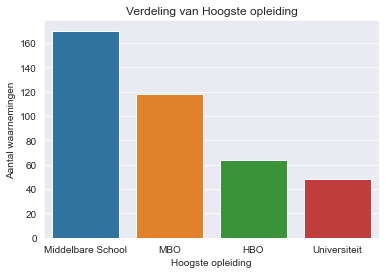

In [32]:
sns.countplot(data=df, x='Hoogste_opleiding')
plt.xlabel('Hoogste opleiding')
plt.ylabel('Aantal waarnemingen')
plt.xticks([0, 1, 2, 3], ['Middelbare School', 'MBO', 'HBO', 'Universiteit'])
plt.title('Verdeling van Hoogste opleiding')
plt.show()

Bij een ordinaal meetniveau word altijd gekeken naar de mediaan. Hoewel de modus ook een mogelijkheid zou zijn, is deze waarde vaak niet geschikt als kengetal bij ordinale variabelen. De modus kan namelijk zal namelijk het meest voorkomende niveau geven, in plaats van dat de mediaan het middelste niveau weergeeft.

In [10]:
print(np.median(df['Hoogste_opleiding']))

2.0


De mediaan geeft als waarde 2 terug, dit geeft aan dat het middelste niveau van de personen in de dataset het MBO is. Als de mediaan wordt bepaalt geeft dat ook opening om te kijken naar de spreiding, om een duidelijker beeld te schetsten. Hiervoor wordt De IQR, Inter Quartile Range, gebruikt. Dit kan op de volgende manier:

In [11]:
q1, q3 = np.percentile(df['Hoogste_opleiding'], [25, 75])
iqr = q3 - q1
print(f'{q3} - {q1} = {iqr}')

3.0 - 1.0 = 2.0


Zoals te zien is aan de getoonde berekening, is de q1 waarde 1 (= Middelbare School) en de q3 waarde is 3 (= HBO). Dit geeft aan dat op de afstand tussen de zones van 25% en 75% van de data 2 niveaus groot is.

[Terug naar het begin](#begin)

--------------------

### Leeftijd <a name='age'></a>
Leeftijd bevindt zich op het meetniveau ratio. Ten opzichte van een interval, nemen wij de waarde leeftijd aan met de geboorte als absoluut nulpunt. Daardoor is er een keuze tussen het gemiddelde en de mediaan. Wegens de hoeveelheid data en kennis beschikbaar is er gekozen voor de mediaan. Leeftijd kan namelijk erg breedt zijn, ook in de eerste 5 regels is dit te zien. De hoogste waarde is 61 en de laagste waarde is 39. De mediaan van de leeftijd is 46, het middelste getal van de getallenreeks {39, 46, 46, 48, 61}. Ook hier moet de IQR weer worden berekent:
```
Q1 is 43, het midden van {39, 46} en Q3 is 54, het midden van {48, 61}. De IQR is dan weer Q3 - Q1 = IQR, dus 54 - 43 = 11
```

Voor de variabele Leeftijd in de gehele dataset, kunnen we een geschikte grafiek maken om de verdeling van leeftijden te visualiseren. Aangezien Leeftijd een numerieke variabele is, kunnen we een histogram gebruiken om de frequentie of het aantal waarnemingen in verschillende leeftijdsgroepen weer te geven. Deze grafiek wordt getoond met behulp van de sns.histplot functie.

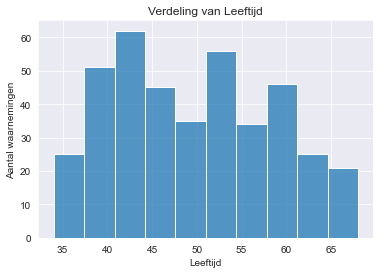

In [33]:
sns.histplot(data=df, x='Leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Aantal waarnemingen')
plt.title('Verdeling van Leeftijd')
plt.show()

Voor numerieke waardes van interval of ratio niveau is een keuze tussen de mediaan of het gemiddelde als kengetal belangrijk. Voor de leeftijd is gekozen om de mediaan te nemen. Deze waarde is gekozen omdat de verdeling meerdere pieken heeft rond bepaalde leeftijdsgroeperingen, hierdoor is het lastig te zeggen of de data goed normaal verdeeld is.

In [13]:
print(np.median(df['Leeftijd']))

49.0


Het bepalen van de mediaan geeft de leeftijd 49 weer. Dit betekent dat de middelste waarde tussen alle leeftijden 49 is. Het gemiddelde kan hiervan afwijken, omdat deze sneller wordt beïnvloedt door outliers. Bij de mediaan hoort ook nog de IQR, deze zal meer inzage geven over de spreiding van de leeftijd.

In [14]:
q1, q3 = np.percentile(df['Leeftijd'], [25, 75])
iqr = q3 - q1
print(f'{q3} - {q1} = {iqr}')

56.0 - 42.0 = 14.0


Deze berekening geeft aan dat er 14 jaar zit tussen de 25% en de 75% lijn van de totale data. Aangezien de data van de Leeftijd variabele strekt van 34 tot 66, is er te zien dat de data buiten deze percentielen meer gespreid is dan de data binnen de percentielen.

[Terug naar het begin](#begin)

--------------------

### BMI <a name='bmi'></a>
De BMI waarde bevindt zich op interval niveau. Dit is omdat deze numerieke waarde geen duidelijk absoluut nulpunt heeft. Dit is omdat een BMI van 0 niet speceficeerd welk van de 2 waardes dan nul zou zijn, de lengte van een individu of het gewicht van een individu. Daarnaast is het onmogelijk om als persoon geen lengte of gewicht te hebben op aarde, waardoor een BMI van nul niet al nulpunt kan worden beschouwd. Omdat de BMI een wat stabielere waarde is dan leeftijd, hiermee wordt bedoeld dat de waarde meer consistent tussen bepaalde waardes in ligt, wordt er gekozen voor het gemiddelde. Het gemiddelde is de som van alle waarden gedeeld door het aantal waarnemingen. De waarde is:

$ (26.97 + 28.73 +25.34 + 28.58 + 23.10) / 5 = 132.72 / 5 = 26.54 $ 

Bij het gemiddelde komt ook de standaard deviatie kijken, een waarde die meer inzage geeft over de spreiding van de data. Deze waarde wordt berekent door de wortel te nemen van de varaintie. In de onderstaande formule worden deze gecombineerd, waarbij de berekening binnen de wortel van de variantie is. Omdat de gebruikte data maar een deel van de totale data is zal bij het aantal waarnemingen (n) er de waarde 1 vanaf getrokken worden, om te corrigeren voor de potetiële bias. 

$\sqrt{\frac{\sum(x - gem)^2}{n - 1}} $


De waarde van n - 1 is: <br> $ n - 1 = 5 - 1 = 4 $ <br>
De waarde van SOM(x-gem) is: <br> $ (26.97 - 26.54)^2 + (28.73 - 26.54)^2 + (25.34 - 26.54)^2 + (28.58 - 26.54)^2 + (23.10 - 26.54)^2 = 22.41619999999 $<br>
De variantie is: <br> $ \frac{22.41619999999}{4} = 5.6040499999999955 $ <br>
De standaard deviatie is: <br> $ \sqrt5.6040499999999955 = 2.3672874772616854 $


De grafiek die het beste past bij het tonen van de verdeling van de BMI is een histogram. Histogrammen laten duidelijk de spreiding zien van de waardes in de kolom. Deze waardes zullen dichter bij elkaar liggen wegens de waardes die BMI kan aannemen. De verwachting is dat de BMI waarden een rechtsscheve verdeling gaan tonen, omdat de meeste mensen een gezond tot licht overgewicht als BMI zullen hebben. Dit zijn de waardes 20 tot en met 30. Ook deze data wordt gevisualiseerd met behulp van de sns.histplot functie.

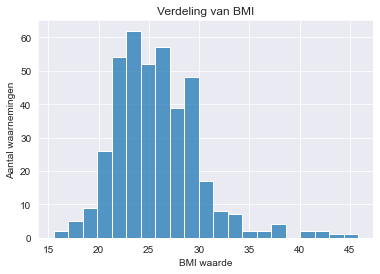

In [34]:
sns.histplot(data=df, x='BMI_waarde')
plt.xlabel('BMI waarde')
plt.ylabel('Aantal waarnemingen')
plt.title('Verdeling van BMI')
plt.show()

Voor numerieke waardes van interval of ratio niveau is een keuze tussen de mediaan of het gemiddelde als kengetal belangrijk. Na het bekijken van de verdeling is er voor de BMI is gekozen om de mediaan te nemen. Deze waarde is gekozen omdat er outliers aanwezig zijn. De bedoeling is om de outliers zo min mogelijk mee te laten wegen, de mediaan zal hierbij helpen. Ook is de data niet normaal verdeeld, waardoor het gemiddelde niet accuraat zal zijn.

In [16]:
print(np.median(df['BMI_waarde']))

25.36


Het bepalen van de mediaan geeft een BMI van 25.36 weer. Dit betekent dat de middelste waarde tussen alle BMI waardes 25.36 is. Het gemiddelde kan hiervan afwijken, omdat deze sneller wordt beïnvloedt door outliers. Bij de mediaan hoort ook nog de IQR, deze zal meer inzage geven over de spreiding van de leeftijd.

In [17]:
q1, q3 = np.percentile(df['BMI_waarde'], [25, 75])
iqr = q3 - q1
print(f'{q3} - {q1} = {iqr}')

28.225 - 22.8975 = 5.327500000000001


Deze berekening geeft aan dat er tussen de 25% en de 75% lijn van de data maar een verschil is van 5.33. Dit is ten opzichte van de totale range (die van ca. 16 tot ca. 45 gaat) erg weinig. Dit betekent dat de meeste data erg dicht bij elkaar licht, zoals ook op de histogram te zien is. De spreiding van de data is rondom de mediaan is dus nauwelijks aanwezig.

[Terug naar het begin](#begin)

--------------------

### Werkeloos <a name='werkeloos'></a>
De kolom werkeloos bevindt zich op het nominale meetniveau, voor deze reden zal de modus gebruikt worden als kengetal. Om op een duidelijke manier met deze waarde om te kunnen gaan in python, zijn de waardes omgezet naar het volgende: {0 : werkeloos, 1 : niet werkeloos}.

De modus van de eerste 5 regels is 0, er zijn namelijk 5 nullen te vinden. Dit geeft aan, op basis van de eerste 5 regels, dat de meest voorkomende waarde werkeloos is.

Omdat bij de kolom 'Werkeloos' sprake is van een nominale waarde met 2 mogelijke opties, is er gekozen voor een staafdiagram. Op deze manier is het makkelijk te zien hoe de verdeling in elkaar zit. Ook is het verschil tussen de waarde 'werkeloos' en 'niet werkeloos' op deze manier het makkelijkst te tonen. Deze grafiek kan worden opgesteld worden door de seaborn functie sns.countplot te gebruiken, zoals te zien in het voorbeeld hieronder.

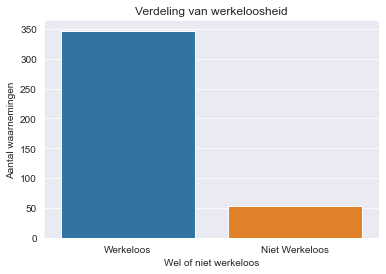

In [35]:
sns.countplot(data=df, x='Werkeloos')
plt.xlabel('Wel of niet werkeloos')
plt.ylabel('Aantal waarnemingen')
plt.xticks([0, 1], ['Werkeloos', 'Niet Werkeloos'])
plt.title('Verdeling van werkeloosheid')
plt.show()

Het kengetal dat het beste past bij elke nominale waarde is de modus, dit is omdat er voor de andere kengetallen gebruik gemaakt moet worden van volgorde of duidelijke numerieke waarden. Voor nominale waarden is het daarom dus makkelijker om te kijken naar de frequentie en de modus.

In [19]:
print(df['Werkeloos'].value_counts())

0    347
1     53
Name: Werkeloos, dtype: int64


Door naar de frequentie te kijken van de waardes is duidelijk te zien dat de meeste mensen 0 (= werkeloos) hebben ingevuld. Dit geeft aan dat de modus, met een redelijk hoog percentage van ongeveer 87%, op werkeloos ligt in deze dataset.

[Terug naar het begin](#begin)

------------

## Tabel van kengetallen en grafieken <a name='tabel'></a>
Hier is een tabel gemaakt met de kengetallen en grafieken die zinvol zijn om te gebruiken bij het analyseren van de data.

<table align='left'>
  <tr>
    <th>Meetniveau's</th>
    <th>Centrummaten</th>
    <th>Spreidingsmaten</th>
    <th>Welke maat wanneer?</th>
    <th>Grafieken</th>
    <th>Welke grafiek wanneer?</th>
  </tr>
  <tr>
    <td>Nominaal</td>
    <td>- Modus</td>
    <td>- Geen</td>
    <td>- N.V.T.</td>
    <td>- Staafdiagram<br>- Cirkeldiagram</td>
    <td>- Voor de frequentie van de variabelen<br>- Voor de proporties van de variabelen</td>
  </tr>
  <tr>
    <td>Ordinaal</td>
    <td>- Modus<br>- Mediaan</td>
    <td>- Geen<br>- Inter Quartile Range</td>
    <td>- Vinden van de meest populaire optie<br>- Vinden van de middelste waarde</td>
    <td>- Staafdiagram</td>
    <td>- N.V.T.</td>
  </tr>
  <tr>
    <td>Interval</td>
    <td>- Mediaan<br>- Gemiddelde</td>
    <td>- Inter Quartile Range<br>- Variantie/Standaard deviatie</td>
    <td>- Outliers of niet-normaal verdeeld<br>- Normaal verdeeld en weinig outliers</td>
      <td>- Histogram<br>- Lijngrafiek<br>- Boxplot</td>
    <td>- Voor de verdeling van de variabelen<br>- Voor het tonen van de variabelen t.o.v. continue variabel<br>- Bekijken van mediaan, verdeling en outliers</td>
  </tr>
  <tr>
    <td>Ratio</td>
    <td>- Mediaan<br>- Gemiddelde</td>
    <td>- Inter Quartile Range<br>- Variantie/Standaard deviatie</td>
    <td>- Outliers of niet-normaal verdeeld<br>- Normaal verdeeld en weinig outliers</td>
    <td>- Zelfde als Interval<br>- Scatterplot<br>- Staafdiagram</td>
    <td>- Zie interval niveau<br>- Voor het tonen van de waarden t.o.v. een andere numerieke waarde<br>- Voor het tonen van de verdeling op basis van categorie</td>
  </tr>
</table>



[Terug naar het begin](#begin)

------------

## Analyse van een binaire kolom <a name='rokers'></a>
De waardes van een binaire kolom zijn altijd 0 en 1. Deze waarden zijn ook terug te vinden in de Roker kolom, deze kolom heeft dus de volgende waardes: <br>{0 : ja, 1 : nee}. Om het aantal rokers te vinden kunnen de rijen geteld worden waarbij de waarde gelijk staat aan 0. Voor het aantal mensen dat deel nam aan de enquete kan de lengte van de dataset worden gebruikt. Deze waarden samen worden gebruikt om het percentage rokers uit te rekenen, dit gebeurt door middel van de volgende methode: 

${\frac{Deel}{Geheel}} * 100 $

In [20]:
# Tonen van aantal rokers en het totaal aantal personen
aantal_rokers = len(df[df['Roker'] == 0])
totaal_personen = len(df)
print(f'Het aantal rokers in de dataset is: {aantal_rokers}')
print(f'Het totaal aantal personen is: {totaal_personen}')

# Berekenen en tonen van percentage mensen dat rookt
percentage_rokers = aantal_rokers / totaal_personen * 100
print(f'Het percentage mensen dat rookt is: {percentage_rokers}%')

Het aantal rokers in de dataset is: 209
Het totaal aantal personen is: 400
Het percentage mensen dat rookt is: 52.25%


Vervolgens word de kans berekend dat 3 willekeurige personen het antwoord 'ja' hebben ingevuld. Het percentage mensen dat rookt volgens de data is 52.25%. Door deze waarde tot de macht van 3 te nemen wordt de kans berekent dat deze gebeurtenis 3 maal voor zal komen. Deze berekening verloop als volgt:

$ 0.5225^3 = 0.142645766 $

Deze berekening geeft aan dat de kans dat 3 willekeurige mensen allemaal ja hebben ingevuld gelijk is aan:

$ 0.142645766 * 100 = 14.26\% $

Nadat deze berekening is gedaan wordt de kans berekent dat slechts 1 van deze 3 personen ja heeft ingevuld. De mogelijke scenario's voor deze kans zijn:<br>u = {nee, nee, ja}, u = {nee, ja, nee} en u = {ja, nee, nee}. De kans dat 1 persoon een roker is volgens de dataset is 52.25%, dit betekent dat er een 47.75% kans is om een niet roker te zijn. 

Daarna worden de kans op deze gebeurtenis vermenigvuldigd met 3, om zo de kans te berekenen dat dit exacte scenario voorkomt. Om dit te berekenen word de formule voor binominale kans toegepast:<br>
$ P(X = k) = C(n, k) * p^k * (1 - p)^{n - k}$<br>

Dit geeft de volgende kans: <br>
$ P(X = 1) = C(3, 1) * 0.5225^1 * (1 - 0.5225)^{3 - 1} = 3 * 0.5225 * 0.4775^2 = 0.357399796875 $<br>

De berekening laat zien dat de kans dat deze gebeurtenis voor zal komen is 35.74%.

[Terug naar het begin](#begin)

--------------------

## Discrete en Continue verdelingen <a name='cholesterol'></a>

In de wereld van kansrekenen spreken we van 2 verschillende soorten verdelingen, discrete en continue verdelingen. Het verschil tussen de twee verdelingen ligt in het type waardes dat ze aan kunnen nemen. Continue verdelingen beschijven de mogelijkheden en kunnen waardes aannemen van eindeloze variatie, dit is een groep variabelen die een oneindige en ontelbare variatie heeft. Bij continue verdelingen wordt vaak gekeken of de waarde binnen een bepaald interval valt. Voorbeelden van continue verdelingen zijn de normaal verdeling en de exponetiële verdeling.

Discrete verdelingen beschrijven de waarschijnlijkheid van het voorkomen van bepaalde variabelen. Deze verdeling heeft telbare variabelen, zoals een inventarisatie van niet-negatieve gehele getallen. Bij discrete verdelingen wordt er vaak gekeken wat de kans is op die gebeurtenis. Voorbeelden van discrete verdelingen zijn de binominale verdeling en de poisson verdeling.

Voor alle soorten verdelingen moeten de volgende twee eigenschappen kloppen:

- De kans van elke uitkomst heeft een waarde van 0 t/m 1, deze waarde kan dus nooit negatief zijn.
- De totale som van de kans is gelijk aan 1.

Cholesterol is een aparte waarde, dit komt door het type verdeling dat deze waarde vaak aanneemt. Technisch gezien is cholesterol een discrete variabele, maar toch word de cholesterol waarde vaak als continue variabel gebruikt. Dit heeft de volgende redenen:

- **Geen verlies van data**: Als cholesterol als discrete variabel aangenomen zou worden, zullen de subtielere verschillen wegvallen.
- **Medisch onderzoek**: Bij medisch onderzoek is het belangrijk dat onderzoekers meer gedetailleerde kunnen uitvoeren met cholesterol, om bijvoorbeeld te kijken of het invloed heeft op andere gezondheidsfactoren.
- **Nauwkeurigheid**: Doordat cholesterol als continue wordt gezien zijn de modellen die ermee worden gemaakt veel nauwkeuriger dan wanneer cholesterol een discrete verdeling zou hebben.

[Terug naar het begin](#begin)

------------

## Correlatie tussen kolommen <a name='corr_1'></a>

In [45]:
correlation, p_value = scipy.stats.pearsonr(df['Roker'], df['Sigaretten_per_dag'])
print(f"Correlatie tussen Roker en Sigaretten_per_dag: {correlation}, p-value: {p_value}")

1:80: E501 line too long (82 > 79 characters)
2:80: E501 line too long (90 > 79 characters)


Correlatie tussen Roker en Sigaretten_per_dag: 0.7811054235896487, p-value: 2.005976452124073e-83


1 = roker en Sigaretten_per_dag<br>
De Pearson correlatiecoëfficiënt is 0.781, een sterke positieve correlatie dus. dit houd in dat rokers over het algemeen meer sigaretten per dag roken. de p-waarde is praktisch 0, de correlatie is dus zeer significant. Roker en Sigaretten_per_dag

In [44]:
# Leeftijd en Hoge_bloeddruk
correlation, p_value = scipy.stats.pearsonr(df['Leeftijd'], df['Hoge_bloeddruk'])
print(f"Correlatie tussen Leeftijd en Hoge_bloeddruk: {correlation}, p-value: {p_value}")

2:80: E501 line too long (81 > 79 characters)
3:80: E501 line too long (89 > 79 characters)


Correlatie tussen Leeftijd en Hoge_bloeddruk: 0.2700079215403774, p-value: 4.1236757048904313e-08


In [43]:
# Cholesterolwaarde en Hoge_bloeddruk
correlation, p_value = scipy.stats.pearsonr(df['Cholesterolwaarde'], df['Hoge_bloeddruk'])
print(f"Correlatie tussen Cholesterolwaarde en Hoge_bloeddruk: {correlation}, p-value: {p_value}")

2:80: E501 line too long (90 > 79 characters)
3:80: E501 line too long (98 > 79 characters)


Correlatie tussen Cholesterolwaarde en Hoge_bloeddruk: 0.12705508764735815, p-value: 0.010975903208677027


dit zijn de koppels van variabele die we hebben gekozen met uitleg waarom we die hebben gekozen;

roken en Sigaretten_per_dag: deze hebben we gekozen omdat we denken dat mensen die roken ook een hoger aantal sigaretten per dag hebben. we verwachten dus een sterke positieve correlatie.

2= leeftijd en Hoge_bloeddruk: we verwachten dat mensen die ouder zijn ook een hogere bloeddruk hebben. we verwachten dus hier ook een positieve correlatie

3= Cholesterolwaarde en hoge_bloeddruk: we verwachten dat mensen met een hogere cholesterolwaarde ook een hogere bloeddruk hebben. we verwachten dus hier ook een postieve correlatie.

vervolgens moeten we de correlatie tussen de koppels ook daadwerkelijk gaan uitrekenen. hiervoor gebruiken we de Pearson correlatiecoëfficiënt. we hebben voor de Pearson correlatiecoëfficiënt gekozen omdat het over lineaire variabelen gaat en de variabelen op continue schaal worden gemeten. dit zijn de berekeningen:

2= leeftijd en Hoge_bloeddruk: correlation, p_value = scipy.stats.pearsonr(df['Leeftijd'], df['Hoge_bloeddruk']) print(f"Correlatie tussen Leeftijd en Hoge_bloeddruk: {correlation}, p-value: {p_value}") De Pearson correlatiecoëfficiënt is 0.270, een zwakke positieve correlatie dus. dit betekent dat ouderen een iets hogere bloeddruk hebben. de p-waarde is een stuk kleiner dan 0.05, dit betekent dat de correlatie niet significant is.

3= Cholesterolwaarde en hoge_bloeddruk: correlation, p_value = scipy.stats.pearsonr(df['Cholesterolwaarde'], df['Hoge_bloeddruk']) print(f"Correlatie tussen Cholesterolwaarde en Hoge_bloeddruk: {correlation}, p-value: {p_value}") De Pearson correlatiecoëfficiënt is 0.127, een zeer zwakke correlatie dus. dit betekend dat mensen met een hogere Cholesterolwaarde enigzins vaker hoge bloeddruk hebben, maar verband is erg zwak dus hoeft niet per se vaak zo te zijn. De p-waarde is net onder 0.05, wat aangeeft dat de correlatie significant is.

het komt er dus op neer dat onze verwachtingen enigzins kloppen. het verband is tussen roken en Sigaretten_per_dag het sterkste. de correlaties van leeftijd en cholesterolwaarde met bloeddruk zijn zwakker maar alsnog wel significant.

[Terug naar het begin](#begin)

--------------------

# Deel B <a name = 'deelb'> </a>

## Basiswaarden samengestelde variabele <a name='bas'></a>

Het combineren van verschillende variabelen tot een samengestelde variabele, zoals in dit geval "Mental_Health", vereist dat aan enkele basisvoorwaarden wordt voldaan:

**Consistentie van meetniveaus**: Alle variabelen die worden gebruikt, moeten op een vergelijkbaar niveau worden gemeten. Als de variabelen in rangorde worden gemeten (zoals: slecht, midden, goed), dan moeten alle variabelen op deze schaal worden gemeten om ze bij elkaar op te kunnen tellen voor een nieuwe variabele.

**Gelijkwaardig belang**: Wanneer je de 'scores', van de variabelen waaruit "Mental_Health" wordt gemaakt, optelt, wordt er vanuit gegaan dat elke variabele even zwaar weegt voor de uiteindelijke variabele. Als één variabele zwaarder weegt dan de andere, dan moet er een gewichtsfactor toegepast worden wanneer de scores bij elkaar worden opgeteld. Als geen van de variabele zwaarder weegt dan de andere, en ze allemaal even zwaar wegen, dan dragen de aspecten evenredig bij aan "Mental_Health".

**Controle**: Er moet nagegaan worden of mensen die goed of slecht presteren op verschillende aspecten, ook goed of slecht scoren op "Mental_Health". Dit kan gebeuren door te kijken naar de verbanden tussen elke afzonderlijke variabele en "Mental_Health". Ook kan er gekeken worden naar de eventuele verschillen tussen de "Mental_Health" kolom en de al bestaande "Mentale_gezondheid" kolom.

**Betrouwbaarheid**: Alle metingen bij elke variabele moeten betrouwbaar zijn. Dus als we dezelfde variabelen op een ander tijdstip meten, moeten er dezelfde antwoorden uitkomen.

Het is goed om te weten dat dit soort samengevoegde variabelen, hoewel ze handig zijn, ook beperkingen hebben. Deze variabelen kunnen helpen om algemene patronen te zien, maar ze kunnen ook de unieke ervaringen van mensen verbergen. Daarom moet er zowel naar de samengevoegde variabele "Mental_Health" als naar de losse variabelen kijken als de resultaten van het onderzoek begrepen willen worden.

--------------------

## Het maken van Mental_Health <a name='mental'></a>

Eerst is er gekeken naar alle kolommen die gebruikt worden om op te tellen:

In [36]:
kolommen = ['Sociaal_functioneren', 'Empatisch_reageren',
            'Positieve_levenshouding', 'Mentale_vaardigheden',
            'Leven_in_balans', 'Persoonlijke_grenzen']

for kol in kolommen:
    print(f'Spreiding {kol}:')
    display(df[kol].value_counts())

Spreiding Sociaal_functioneren:


4    104
3    102
2     97
1     61
5     36
Name: Sociaal_functioneren, dtype: int64

Spreiding Empatisch_reageren:


3    115
2    107
1     84
4     74
5     20
Name: Empatisch_reageren, dtype: int64

Spreiding Positieve_levenshouding:


4    109
2     91
3     88
5     58
1     54
Name: Positieve_levenshouding, dtype: int64

Spreiding Mentale_vaardigheden:


2    98
3    98
4    89
1    82
5    33
Name: Mentale_vaardigheden, dtype: int64

Spreiding Leven_in_balans:


4    103
3     87
2     86
5     67
1     57
Name: Leven_in_balans, dtype: int64

Spreiding Persoonlijke_grenzen:


2    101
3     94
4     92
1     77
5     36
Name: Persoonlijke_grenzen, dtype: int64

Wat hier opviel is dat de kolom 'Persoonlijke_grenzen' 1 waarde heeft die op 0 staat. Deze waarde moet omgezet worden naar 1, wat de laagst mogelijke waarde hoort te zijn.

In [37]:
df.Persoonlijke_grenzen.replace(0, 1, inplace=True)
df['Persoonlijke_grenzen'].value_counts()

2    101
3     94
4     92
1     77
5     36
Name: Persoonlijke_grenzen, dtype: int64

Nu dit probleem is verholpen word de kolom aangemaakt door de waardes bij elkaar op te tellen.

In [42]:
df['Mental_Health'] = df[kolommen].sum(axis=1)
display(df['Mental_Health'])

0      14
1      24
2      25
3      22
4      16
       ..
395    23
396    16
397    15
398    20
399    20
Name: mental_health, Length: 400, dtype: int64

De gemaakte variabele "Mental_Health" is ordinair van aard. Dat betekent dat de waarden in een bepaalde volgorde voorkomen, maar er is geen vaste, gelijke afstand en betekenis tussen de waardes die deze variabele aan kan nemen.

Dit komt omdat "Mental_Health" de optelsom is van zes andere variabelen die ook ordinair zijn. Deze variabelen zijn "sociaal_functioneren", "empatisch_reageren", "positieve_levenshouding", "mentale_vaardigheden", "leven_in_balans" en "persoonlijke_grenzen". Ze worden allemaal gemeten op een schaal van 1 tot 5, waarbij 1 betekent "niet" en 5 betekent "volledig".

Hoewel "Mental_Health" soms behandeld kan worden alsof het een interval is (wat betekent dat de stappen tussen de waarde een vaste, gelijke afstand en betekenis hebben), is dat niet correct en kan het soms tot misleidende resultaten leiden. Het is dus belangrijk om te onthouden dat "Mental_Health" ordinair is wanneer deze variabele gebruikt wordt in analyses.

[Terug naar het begin](#begin)

--------------------

## Opgave 16

[Terug naar het begin](#begin)

--------------------

## Opgave 17

[Terug naar het begin](#begin)

--------------------

# Deel C <a name='deelc'></a>

## Het lineaire verband <a name='lineair'></a>

Een lineair verband is de relatie tussen twee variabelen waarbij de verandering in een van de variabelen samenhangt met de andere variabele op een rechte lijn. Dit houd in dat als een van de variabelen toeneemt, de ander dit op een constante en voorspelbare wijze ook doet.

In wiskundige termen kan dit worden uitgedrukt in de standaard lineaire vergelijking: $ y = ax + b $. Deze formule bestaat uit vier waardes: x, y, a en b.
- x is de onafhankelijke variabele
- y is de afhankelijke variabele
- a is de richtingscoëfficient
- b de kruising van de lijn met de y-as.

Bij deze formule zijn a en b constante waardes, deze kunnen in een verband niet van waarde veranderen. Doordat de waardes van a en b constant zijn, kan er in één oog opslag gezien worden hoe de lijn in het verband zich vormt. De a-waarde laat zien hoeveel de y-waarde beweegt voor elke stap die x zet. Terwijl de b-waarde toont wat de y-waarde zal zijn als x niet aanwezig is. Samen zorgen de vier variabelen voor een stabiele en simpel voorspelbare lijn. In het kort is een lineair verband dus de constante en voorspelbare correlatie tussen twee variabelen in de vorm van een rechte lijn.

[Terug naar het begin](#begin)

--------------------

## Opgave 19

[Terug naar het begin](#begin)

--------------------

## Opgave 20

[Terug naar het begin](#begin)

--------------------

## Opgave 21

[Terug naar het begin](#begin)

--------------------

## Opgave 22

[Terug naar het begin](#begin)

--------------------

## Opgave 23

[Terug naar het begin](#begin)

--------------------

## Opgave 24

[Terug naar het begin](#begin)

--------------------

## Opgave 25

[Terug naar het begin](#begin)

--------------------

## Opgave 26

[Terug naar het begin](#begin)

--------------------

## Opgave 27

[Terug naar het begin](#begin)

--------------------

## Opgave 28

[Terug naar het begin](#begin)

--------------------

## Opgave 29

[Terug naar het begin](#begin)

--------------------

## Opgave 30

[Terug naar het begin](#begin)

--------------------

## Opgave 31

[Terug naar het begin](#begin)

--------------------

## Opgave 32

[Terug naar het begin](#begin)

--------------------

## Opgave 33

[Terug naar het begin](#begin)

--------------------